# Import Packages

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

# Read Data

In [2]:
df = pd.read_csv(r'C:\Users\HP\Documents\Data_Analyst_Portfolio_Projects\rides.csv')
df.head()

,Drivers Active Per Hour,Riders Active Per Hour,Rides Completed
0,72,295,202.0
1,50,78,43.0
2,40,250,181.0
3,78,140,124.0
4,74,195,108.0


In [3]:
df.shape

(1099, 3)

In [4]:
df.columns

Index(['Drivers Active Per Hour', 'Riders Active Per Hour', 'Rides Completed'], dtype='object')

In [5]:
df.describe()

,Drivers Active Per Hour,Riders Active Per Hour,Rides Completed
count,1099.000000,1099.000000,1045.000000
mean,55.212921,175.372157,107.470813
std,25.896744,72.304222,57.340921
min,10.000000,50.000000,2.000000
25%,34.000000,114.000000,66.000000
50%,55.000000,174.000000,96.000000
75%,78.000000,238.000000,142.000000
max,100.000000,300.000000,273.000000


In [6]:
df.isnull().sum()

Drivers Active Per Hour     0
Riders Active Per Hour      0
Rides Completed            54
dtype: int64

# Drop Null Value rows

In [7]:
df = df.dropna()
df

,Drivers Active Per Hour,Riders Active Per Hour,Rides Completed
0,72,295,202.0
1,50,78,43.0
2,40,250,181.0
3,78,140,124.0
4,74,195,108.0
...,...,...,...
1094,55,170,144.0
1095,99,141,117.0
1096,43,82,64.0
1097,35,127,90.0


# Relationship # of active drivers per hour vs. # of riders active per hour

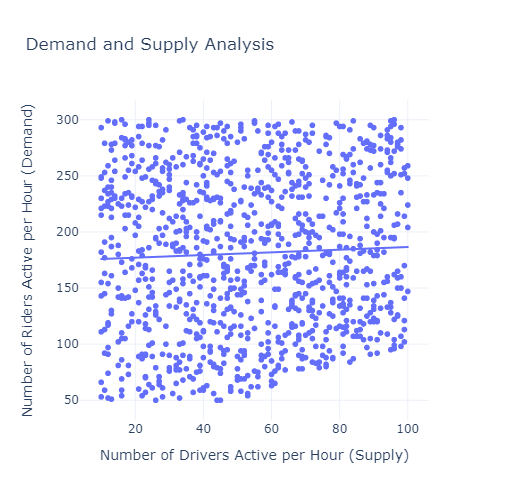

In [34]:
demand = df["Riders Active Per Hour"]
supply = df["Drivers Active Per Hour"]

figure = px.scatter(df, x = "Drivers Active Per Hour",
                    y = "Riders Active Per Hour", trendline="ols", 
                    title="Demand and Supply Analysis")
figure.update_layout(
    xaxis_title="Number of Drivers Active per Hour (Supply)",
    yaxis_title="Number of Riders Active per Hour (Demand)",
    autosize = False,
    width = 550,
    height = 500
)
figure

### The realtionship between the number of drivers active per hour and the number of riders active per hour means that for every X number of drivers, there is a consistent and predictable Y number of riders, and this ratio remains constant over time.


# Elasticity of demand for rides concerning the number of active drivers per hour

In [11]:
avg_demand = df['Riders Active Per Hour'].mean()
avg_supply = df['Drivers Active Per Hour'].mean()
pct_change_demand = (max(df['Riders Active Per Hour']) - min(df['Riders Active Per Hour'])) / avg_demand * 100
pct_change_supply = (max(df['Drivers Active Per Hour']) - min(df['Drivers Active Per Hour'])) / avg_supply * 100
elasticity = pct_change_demand / pct_change_supply

print("Elasticity of demand with respect to the number of active drivers per hour: {:.2f}".format(elasticity))

Elasticity of demand with respect to the number of active drivers per hour: 0.82


### This specifies that there is a moderate responsive relationship between the demand for rides and the number of active drivers per hour. Which means that a 1% increase number of active drivers per hour would lead to a 0.82% decrease in the demand for rides, while a 1% decrease in the number of active drivers per hour would lead to a 0.82% increase in the demand for ride. The level of elasticty suggests the demands for rides is somehwat sensitive to changes in the number of active drivers per hour.

# Supply Ratio vs Driver Activity

In [13]:
df['Supply Ratio'] = df['Rides Completed'] / df['Drivers Active Per Hour']
df.head()

,Drivers Active Per Hour,Riders Active Per Hour,Rides Completed,Supply Ratio
0,72,295,202.0,2.805556
1,50,78,43.0,0.860000
2,40,250,181.0,4.525000
3,78,140,124.0,1.589744
4,74,195,108.0,1.459459


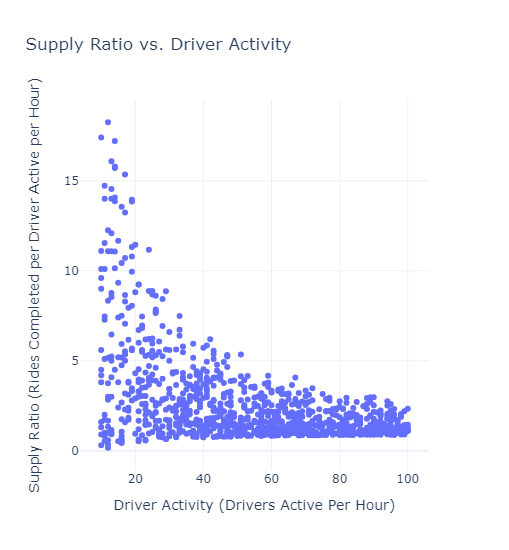

In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Drivers Active Per Hour'], 
                         y=df['Supply Ratio'], mode='markers'))
fig.update_layout(
    title='Supply Ratio vs. Driver Activity',
    xaxis_title='Driver Activity (Drivers Active Per Hour)',
    yaxis_title='Supply Ratio (Rides Completed per Driver Active per Hour)',
    autosize = False,
    width = 600,
    height = 550
)
fig.show()